# CSE 6367 Programming Assignment 1 (P1)

## Spring 2023

## Due: 11:59pm Central Time, Friday, March 17, 2023

### Task 1 (10 points) 

Import the "colors.png" image and convert the image to HSV

change the value/brightness value in the HSV image to 50%, convert the HSV back to RGB, and display the result.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
%matplotlib inline

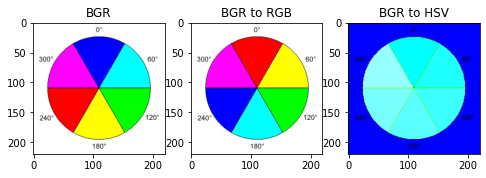

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


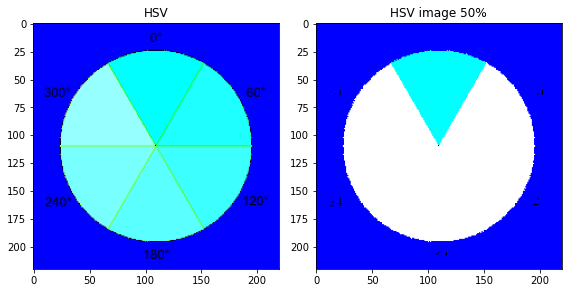

In [74]:
BGRimg = cv2.imread('./Images/color.png')
fig, axes = plt.subplots(1,3,figsize=(8,8))
axes[0].set_title("BGR")
axes[0].imshow(BGRimg)
RGBImg = cv2.cvtColor(BGRimg,cv2.COLOR_BGR2RGB)
axes[1].set_title("BGR to RGB")
axes[1].imshow(RGBImg)
HSVImg = cv2.cvtColor(BGRimg,cv2.COLOR_BGR2HSV)
axes[2].set_title("BGR to HSV")
axes[2].imshow(HSVImg)
plt.show()
## Converting HSV to 50%
fig, axes = plt.subplots(1,2,figsize=(8,8))
axes[0].set_title("HSV")
axes[0].imshow(HSVImg)
axes[1].set_title("HSV image 50%")
axes[1].imshow(HSVImg*0.5)
fig.tight_layout()
plt.show()
# print(HSVImg[:10,:,0])
# print((HSVImg*0.5)[:10,:,0])

### Task 2 (20 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

    a) Flip the image left-right
    b) Rotate the image by 45 degree
    c) Resize the image as 200 X 200 image

Display the original image with a, b, c images in a 2X2 grid

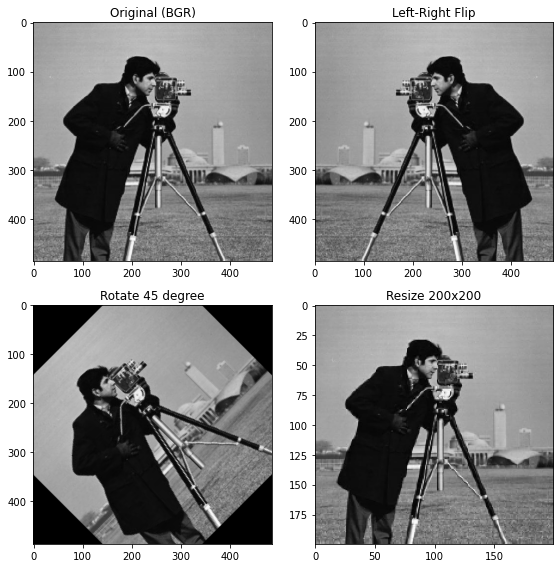

In [160]:
img = cv2.imread('./Images/cameraman.jpeg')
fig, axes = plt.subplots(2,2,figsize=(8,8))

axes[0,0].set_title('Original (BGR)')
axes[0,0].imshow(img)
# axes[0,1].subplot(2,2,2)

axes[0,1].set_title('Left-Right Flip')
axes[0,1].imshow(img[::,::-1])
# axes[1,0].subplot(2,2,3)

axes[1,0].set_title('Rotate 45 degree')
rotated_img_matrix = cv2.getRotationMatrix2D(center=(img.shape[0]/2,img.shape[1]/2),angle=45,scale=1)
rotated_img = cv2.warpAffine(src=img,M=rotated_img_matrix,dsize=(img.shape[0],img.shape[1]))
axes[1,0].imshow(rotated_img)

axes[1,1].set_title('Resize 200x200')
axes[1,1].imshow(cv2.resize(src=img,dsize=(200,200),interpolation=cv2.INTER_LINEAR))

fig.tight_layout()
plt.show()

### Task3 (10 points)

Binarization : Image binarization converts an image to an image with only two levels (usually 0 and 1 or black and white).

Import the "zebra.jpeg" image, convert to grayscale and apply binarization on the image with threshold = 127 or 0.5 



Original (BGR) (466, 699, 3)
Gray  (466, 699)
Binary  (466, 699)


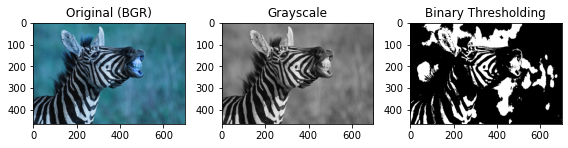

Gray scale
[[121 121]
 [122 122]
 [123 123]
 [123 124]
 [124 124]
 [125 125]
 [125 125]
 [126 126]
 [127 127]
 [128 128]
 [129 129]
 [130 130]
 [131 130]
 [131 131]
 [132 131]]
Binary Thresholding
[[  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [255 255]
 [255 255]
 [255 255]
 [255 255]
 [255 255]
 [255 255]]


In [172]:
img = cv2.imread('./Images/zebra.jpeg')
fig , axes = plt.subplots(1,3,figsize=(8,8))

axes[0].set_title('Original (BGR)')
axes[0].imshow(img)
print("Original (BGR)",img.shape)

axes[1].set_title('Grayscale')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
axes[1].imshow(gray_img,cmap='gray')
print("Gray ",gray_img.shape)

axes[2].set_title('Binary Thresholding')
threshhold = 127
maxval = 255
binary_img = cv2.threshold(gray_img,threshhold,maxval,cv2.THRESH_BINARY)
axes[2].imshow(binary_img[1],cmap='gray')
print("Binary ",binary_img[1].shape)

fig.tight_layout()
plt.show()
# print(img[50:51,50:52])
print("Gray scale")
print(gray_img[180:195,50:52])
print("Binary Thresholding")
print(binary_img[1][180:195,50:52])

### Task 4 (20 points) 
Average Filtering

    a) Import the "cameraman.jpeg"
    b) perform average filtering with kernel size 3X3, 5X5 and 9X9. 

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

Original (Gray)  (487, 487)
outImg shape  (487, 487)
kernel1  (3, 3)		Img1 shape  (487, 487)
outImg shape  (487, 487)
kernel2  (5, 5)		Img2 shape  (487, 487)
outImg shape  (487, 487)
kernel3  (9, 9)		Img3 shape  (487, 487)


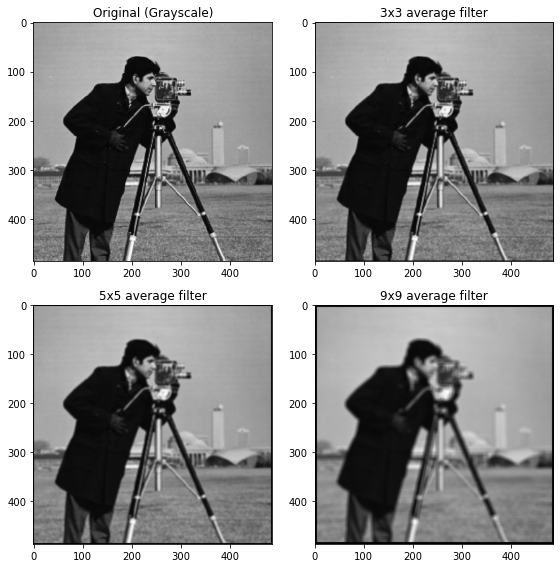

In [11]:
from scipy.ndimage import convolve


def averageFilter(img, kernel, kernel_size):
    outImg = np.zeros_like(img)
    for i in range(kernel_size//2, img.shape[0]-kernel_size//2):
        for j in range(kernel_size//2, img.shape[1]-kernel_size//2):
            patch = img[i-kernel_size//2:i+kernel_size//2+1,
                                  j-kernel_size//2:j+kernel_size//2+1]
            outImg[i, j] = np.mean(patch * kernel)
    print("outImg shape ",outImg.shape)
    return outImg


img = cv2.imread('./Images/cameraman.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)/255.
fig, axes = plt.subplots(2,2,figsize=(8,8))
print("Original (Gray) ",img.shape)
axes[0,0].set_title('Original (Grayscale)')
axes[0,0].imshow(img,cmap='gray')

kernel1 = np.ones(shape=(3,3))
img1 = averageFilter(img, kernel1,3)
print("kernel1 ",kernel1.shape,end='\t\t')
print("Img1 shape ",img1.shape)
axes[0,1].set_title('3x3 average filter')
axes[0,1].imshow(img1,cmap='gray')

kernel2 = np.ones(shape=(5,5))
img2 = averageFilter(img, kernel2,5)
print("kernel2 ",kernel2.shape,end='\t\t')
print("Img2 shape ",img2.shape)
axes[1,0].set_title('5x5 average filter')
axes[1,0].imshow(img2,cmap='gray')

kernel3 = np.ones(shape=(9,9))
img3 = averageFilter(img, kernel3,9)
print("kernel3 ",kernel3.shape,end='\t\t')
print("Img3 shape ",img3.shape)
axes[1,1].set_title('9x9 average filter')
axes[1,1].imshow(img3,cmap='gray')
fig.tight_layout()
plt.show()

### Task 5 (20 points)

Median Filtering

    a) Add salt and pepper noise as 30% of all pixels in "cameraman.jpeg" image
    b) Perform median filtering with kernel size 3X3, 5X5 and 9X9. 
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

Original (Gray)  (487, 487)
outImg shape  (487, 487)
kernel1  (3, 3)		Img1 shape  (487, 487)
outImg shape  (487, 487)
kernel2  (5, 5)		Img2 shape  (487, 487)
outImg shape  (487, 487)
kernel3  (9, 9)		Img3 shape  (487, 487)


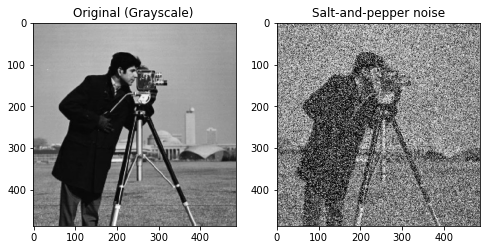

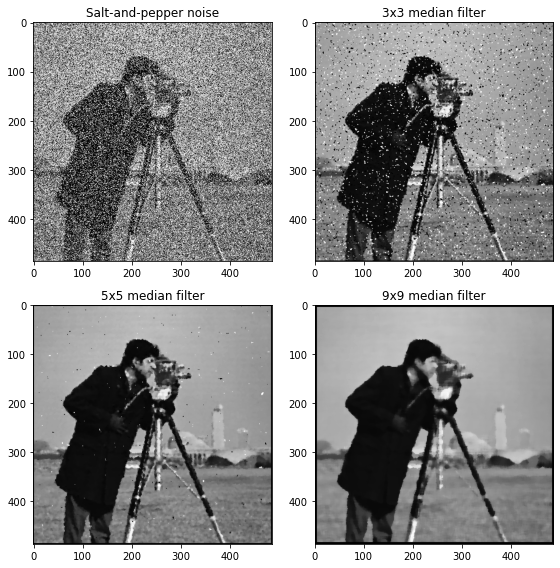

In [9]:
def add_salt_pepper_noise(im,noise_prcnt):
    num_of_noise_pixels = ((im.shape[0]*im.shape[1])*noise_prcnt)//100
#     mx = np.max(im)
#     mn = np.min(im)
    mx = 255
    mn = 0
    for pxl in range(num_of_noise_pixels):
        x_salt = np.random.randint(0,im.shape[0]-1)
        y_salt = np.random.randint(0,im.shape[1]-1)
        x_pepper = np.random.randint(0,im.shape[0]-1)
        y_pepper = np.random.randint(0,im.shape[1]-1)
        im[x_salt][y_salt]=mx
        im[x_pepper][y_pepper]=mn
    return im

def medianFilter(img, kernel, kernel_size):
    outImg = np.zeros_like(img)
    for i in range(kernel_size//2, img.shape[0]-kernel_size//2):
        for j in range(kernel_size//2, img.shape[1]-kernel_size//2):
            patch = img[i-kernel_size//2:i+kernel_size//2+1,
                                  j-kernel_size//2:j+kernel_size//2+1]
            outImg[i, j] = np.median(patch * kernel)
    print("outImg shape ",outImg.shape)
    return outImg


img = cv2.imread('./Images/cameraman.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(1,2,figsize=(8,8))
axes[0].set_title('Original (Grayscale) ')
axes[0].imshow(img,cmap='gray')
axes[1].set_title('Salt-and-pepper noise')
img_noise = add_salt_pepper_noise(img,30)
axes[1].imshow(img_noise,cmap='gray')

fig, axes = plt.subplots(2,2,figsize=(8,8))
print("Original (Gray) ",img_noise.shape)
axes[0,0].set_title('Salt-and-pepper noise')
axes[0,0].imshow(img_noise,cmap='gray')

kernel1 = np.ones(shape=(3,3))
img1 = medianFilter(img_noise,kernel1,3)
print("kernel1 ",kernel1.shape,end='\t\t')
print("Img1 shape ",img1.shape)
axes[0,1].set_title('3x3 median filter')
axes[0,1].imshow(img1,cmap='gray')

kernel2 = np.ones(shape=(5,5))
img2 = medianFilter(img_noise,kernel2,5)
print("kernel2 ",kernel2.shape,end='\t\t')
print("Img2 shape ",img2.shape)
axes[1,0].set_title('5x5 median filter')
axes[1,0].imshow(img2,cmap='gray')

kernel3 = np.ones(shape=(9,9))
img3 = medianFilter(img_noise,kernel3,9)
print("kernel3 ",kernel3.shape,end='\t\t')
print("Img3 shape ",img3.shape)
axes[1,1].set_title('9x9 median filter')
axes[1,1].imshow(img3,cmap='gray')

fig.tight_layout()
plt.show()

### Task 6 (20 points)
Sobel Edge Detection

    a) Apply horizontal and vertical sobel filters on the "cameraman.jpeg" image.
    b) Display the Sobel magnitude image

Original (Gray)  (3000, 4000)
outImg shape  (3000, 4000)
kernel1  (3, 3)		Img1 shape  (3000, 4000)
outImg shape  (3000, 4000)
kernel1  (3, 3)		Img1 shape  (3000, 4000)
Img3 shape  (3000, 4000)


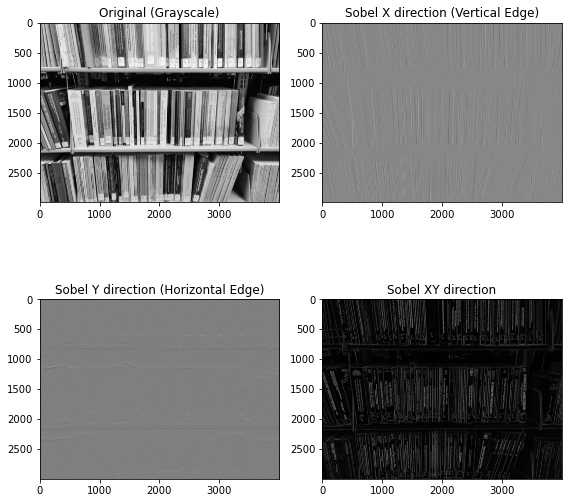

In [3]:
def sobelFilter(img, kernel, kernel_size):
    outImg = np.zeros_like(img)
    for i in range(kernel_size//2, img.shape[0]-kernel_size//2):
        for j in range(kernel_size//2, img.shape[1]-kernel_size//2):
            patch = img[i-kernel_size//2:i+kernel_size//2+1,
                                  j-kernel_size//2:j+kernel_size//2+1]
            outImg[i, j] = np.sum(patch * kernel)
    print("outImg shape ",outImg.shape)
    return outImg


# img = cv2.imread('./Images/cameraman.jpeg')
img = cv2.imread('./Images/IMG_20230318_134536.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)/255.
fig, axes = plt.subplots(2,2,figsize=(8,8))
print("Original (Gray) ",img.shape)
axes[0,0].set_title('Original (Grayscale)')
axes[0,0].imshow(img,cmap='gray')


kernel1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img1 = sobelFilter(img, kernel1,3)
print("kernel1 ",kernel1.shape,end='\t\t')
print("Img1 shape ",img1.shape)
axes[0,1].set_title('Sobel X direction (Vertical Edge)')
axes[0,1].imshow(img1,cmap='gray')


kernel2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
img2 = sobelFilter(img, kernel2,3)
print("kernel1 ",kernel2.shape,end='\t\t')
print("Img1 shape ",img2.shape)
axes[1,0].set_title('Sobel Y direction (Horizontal Edge)')
axes[1,0].imshow(img2,cmap='gray')


img3 = np.sqrt(np.add(np.square(img1),np.square(img2)))
print("Img3 shape ",img3.shape)
axes[1,1].set_title('Sobel XY direction')
axes[1,1].imshow(img3,cmap='gray')

fig.tight_layout()
plt.show()

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
